# Подготовка интервью к необходимому виду

Считаем, что все интервью имеют вид:

И: ...

Р: ...


Если ваше интервью другого типа, преобразуйте его по схеме выше

Формат файла с интервью - docx

In [2]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.0 MB/s eta 0:00:00


In [3]:
import docx

def read_docx(path):
    cur_file = docx.Document(path)
    res = []

    for line in cur_file.paragraphs:
        res.append(line.text)

    return "\n".join(res)

In [4]:
def get_interviewer_lines(text):

    interviewer_lines = []

    for line in text.split('\n'):
        line = line.lstrip()
        if line.startswith("И:"):
            interviewer_lines.append(line[len("И:"):].strip())

    return interviewer_lines

In [5]:
def get_respondent_lines(text):

    respondent_lines = []

    for line in text.split('\n'):
        line = line.lstrip()
        if line.startswith("Р:"):
            respondent_lines.append(line[len("Р:"):].strip())

    return respondent_lines

In [6]:
def get_dialog_pairs(path):
  text = read_docx(path)
  interviewer_lines = get_interviewer_lines(text)
  respondent_lines = get_respondent_lines(text)

  dialogs = []
  count = min(len(interviewer_lines), len(respondent_lines))

  for i in range(count):
    dialogs.append(interviewer_lines[i] + ' ' + respondent_lines[i])

  return dialogs

# Многоклассовая классификация

In [1]:
import pandas as pd

path = '/content/TrainDatasetCurs.xlsx'
interview = pd.read_excel(path)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()

dialog = [f"Вопрос: {q} Ответ: {a}" for q, a in zip(interview["Вопрос"], interview["Ответ"])]
mark = interview["Класс"]

X = vectorizer.fit_transform(dialog)
y = mark

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [4]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8698086794213719
              precision    recall  f1-score   support

          -1       0.91      0.81      0.86       481
           0       0.86      0.92      0.89      1172
           1       0.86      0.80      0.83       490

    accuracy                           0.87      2143
   macro avg       0.88      0.84      0.86      2143
weighted avg       0.87      0.87      0.87      2143



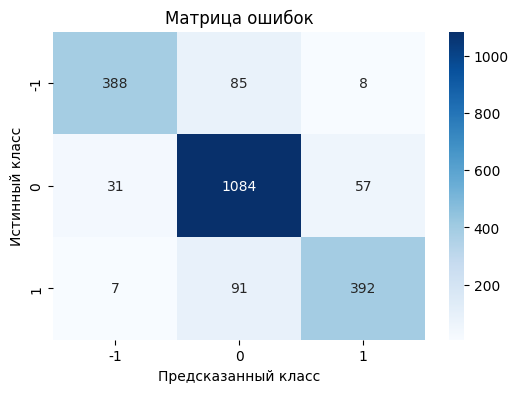

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

matr = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])

plt.figure(figsize=(6, 4))
sns.heatmap(matr, annot=True, fmt='d', cmap='Blues',
            xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()


In [7]:
question = "А чувствуете ли вы себя некомфортно, когда иностранные коллеги задают вам личные вопросы?"
answer = "Мне глубоко неприятно."
dialog = [question + answer]
vector_of_dialog = vectorizer.transform(dialog)
mark = model.predict(vector_of_dialog)
print("Предсказанный класс для нового диалога:", mark[0])

Предсказанный класс для нового диалога: -1


In [8]:
def get_all_marks(path):
  dialogs = get_dialog_pairs(path)

  all_marks = []
  for i in range(len(dialogs)):
    dialog = [dialogs[i]]
    vector_of_dialog = vectorizer.transform(dialog)
    mark = model.predict(vector_of_dialog)

    all_marks.append(int(mark[0]))

  return all_marks


In [35]:
def draw_mistake(vec, all_marks):
    classes = [-1, 0, 1]

    m1 = confusion_matrix(vec, all_marks, labels=classes)
    plt.figure(figsize=(4,3))
    sns.heatmap(m1, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.title('Матрица ошибок')
    plt.show()

In [36]:
def draw_mistake_on_ax(vec, all_marks, ax):
    classes = [-1, 0, 1]
    m1 = confusion_matrix(vec, all_marks, labels=classes)
    sns.heatmap(m1, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Предсказанный класс')
    ax.set_ylabel('Истинный класс')
    ax.set_title('Матрица ошибок')

In [64]:
from collections import Counter

def state(all_marks):
  dict_pattern = Counter(all_marks)
  zero = dict_pattern.get(0, 0)
  ones = dict_pattern.get(1, 0)
  inv_ones = dict_pattern.get(-1, 0)
  print(f"Нейтрально - {zero} из {len(all_marks)}")
  print(f"Стремление - {ones} из {len(all_marks)}")
  print(f"Избегание - {inv_ones} из {len(all_marks)}")


# Тестирование модели на реальных интервью

In [28]:
path1 = "/content/Test1.docx"

all_marks1 = get_all_marks(path1)
print(all_marks1)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
vec1 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

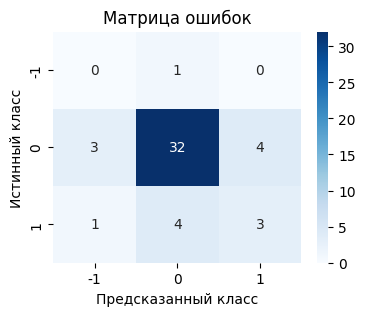

In [37]:
draw_mistake(vec1, all_marks1)

In [65]:
state(all_marks1)

Нейтрально - 37 из 48
Стремление - 7 из 48
Избегание - 4 из 48


In [26]:
path2 = "/content/Test2.docx"

all_marks2 = get_all_marks(path2)
print(all_marks2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]


In [40]:
vec2 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, -1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, -1, 0, 0, 1, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 1, 1]

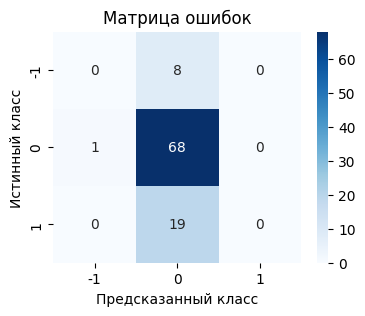

In [41]:
draw_mistake(vec2, all_marks2)

In [67]:
state(all_marks2)

Нейтрально - 95 из 96
Стремление - 0 из 96
Избегание - 1 из 96


In [42]:
path3 = "/content/Test3.docx"

all_marks3 = get_all_marks(path3)
print(all_marks3)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [45]:
vec3 = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

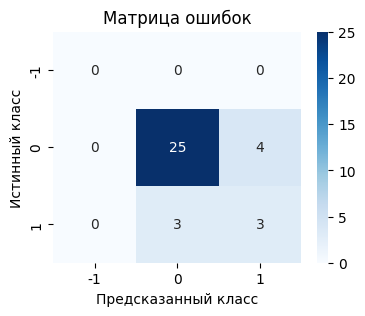

In [46]:
draw_mistake(vec3, all_marks3)

In [68]:
state(all_marks3)

Нейтрально - 28 из 35
Стремление - 7 из 35
Избегание - 0 из 35


In [22]:
path4 = "/content/Test4.docx"

all_marks4 = get_all_marks(path4)
print(all_marks4)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]


In [50]:
vec4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]

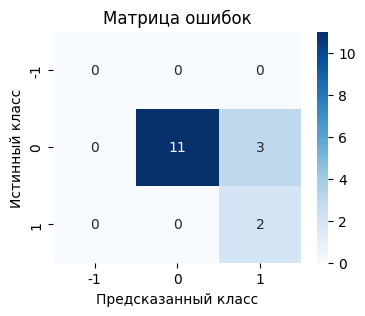

In [51]:
draw_mistake(vec4, all_marks4)

In [69]:
state(all_marks4)

Нейтрально - 11 из 16
Стремление - 5 из 16
Избегание - 0 из 16


In [21]:
path5 = "/content/Test5.docx"

all_marks5 = get_all_marks(path5)
print(all_marks5)

[0, 0, 1, -1, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, -1, 1]


In [20]:
vec5 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

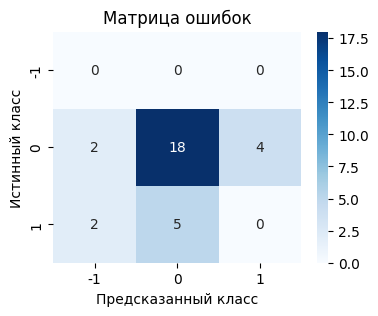

In [52]:
draw_mistake(vec5, all_marks5)

In [70]:
state(all_marks5)

Нейтрально - 23 из 31
Стремление - 4 из 31
Избегание - 4 из 31


In [53]:
path6 = "/content/Test6.docx"

all_marks6 = get_all_marks(path6)
print(all_marks6)

[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [54]:
vec6 = [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]

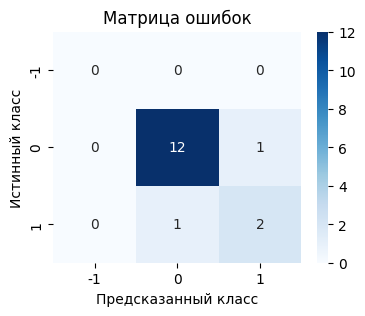

In [56]:
draw_mistake(vec6, all_marks6)

In [71]:
state(all_marks6)

Нейтрально - 13 из 16
Стремление - 3 из 16
Избегание - 0 из 16


In [17]:
path7 = "/content/Test7.docx"

all_marks7 = get_all_marks(path7)
print(all_marks7)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [58]:
vec7 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

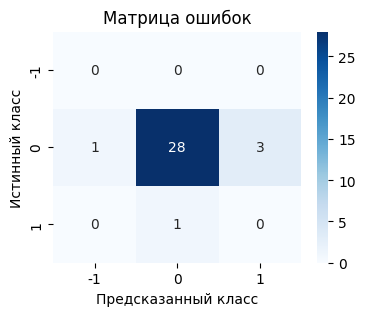

In [59]:
draw_mistake(vec7, all_marks7)

In [72]:
state(all_marks7)

Нейтрально - 29 из 33
Стремление - 3 из 33
Избегание - 1 из 33


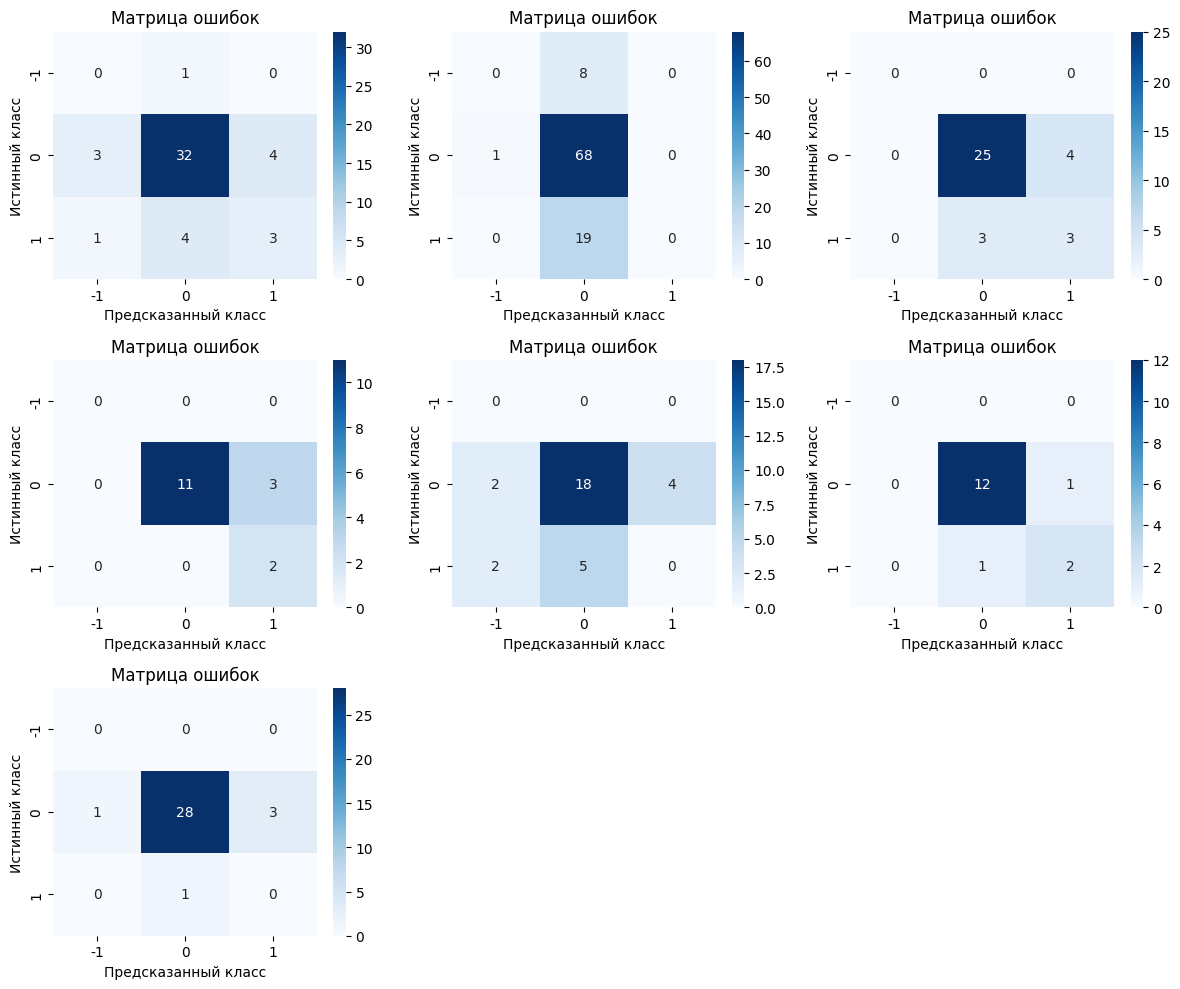

In [63]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.flatten()

vec_list = [vec1, vec2, vec3, vec4, vec5, vec6, vec7]
marks_list = [all_marks1, all_marks2, all_marks3, all_marks4, all_marks5, all_marks6, all_marks7]
for i in range(7):
    draw_mistake_on_ax(vec_list[i], marks_list[i], axs[i])

for j in range(7, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()